Install Jupyter

In [1]:



%pip install jupyter 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
ImportError

ImportError

In [3]:
import sys
print(sys.executable) 

c:\Users\Sakshi Agarwal\AppData\Local\Programs\Python\Python310\python.exe


In [4]:
%pip install pandas numpy scikit-learn shap matplotlib

%pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORT LIBRARIES

In [5]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap 
import matplotlib.pyplot as plt

In [6]:
# Load the dataset

data = pd.read_csv(r'C:\Users\Sakshi Agarwal\Desktop\CV D\Explainable-Machine-Learning-Approaches-for-Cardiovascular-Disease-Risk-Assessment\cardio_data_processed.csv',sep=',' ,header=0,engine='python')

In [7]:

column_names = data.columns.tolist()
print("\nNames of all columns:")
print(column_names)


Names of all columns:
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category', 'bp_category_encoded']


In [8]:
with open(r'C:\Users\Sakshi Agarwal\Desktop\CV D\Explainable-Machine-Learning-Approaches-for-Cardiovascular-Disease-Risk-Assessment\cardio_data_processed.csv') as file:
    for _ in range(5): 
        print(file.readline())


id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded

0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.9671201814059,Hypertension Stage 1,Hypertension Stage 1

1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679158448385,Hypertension Stage 2,Hypertension Stage 2

2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805325987146,Hypertension Stage 1,Hypertension Stage 1

3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71047932495361,Hypertension Stage 2,Hypertension Stage 2



In [9]:

print("\nSummary of the dataset:")
print(data.info())
print(data)



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category

DATA PREPROCESSING

In [10]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [11]:
print("Original age mean:", data['age'].mean())
print("Original age std:", data['age'].std())


Original age mean: 19462.66773696943
Original age std: 2468.3818538285595


In [12]:
if 'age' in data.columns:
    data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()  

if 'gender' in data.columns:
    data = pd.get_dummies(data, columns=['gender'], drop_first=True)  

In [13]:
print(data.dtypes)

id                       int64
age                    float64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category             object
bp_category_encoded     object
gender_2                 uint8
dtype: object


In [14]:

numeric_data = data.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr().abs()


In [15]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [16]:

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]


to_drop = [column for column in to_drop if column in data.columns]


data = data.drop(columns=to_drop)


print("Dropped columns due to high correlation:", to_drop)
print("\nRemaining columns after dropping:")
print(data.columns.tolist())


Dropped columns due to high correlation: ['age_years']

Remaining columns after dropping:
['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'bp_category', 'bp_category_encoded', 'gender_2']


In [17]:
print("Mean age:", data['age'].mean())
print("Std age:", data['age'].std())


Mean age: 2.3044066146196637e-16
Std age: 1.0


In [18]:
X = data.drop('cardio', axis=1)
y = data['cardio']





DATA SPLITTING INTO TRAIN AND TEST 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL TRAINING USING RANDOM FOREST

In [20]:
print(X_train.isnull().sum())  
print(y_train.isnull().sum())  


id                     0
age                    0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
bmi                    0
bp_category            0
bp_category_encoded    0
gender_2               0
dtype: int64
0


In [21]:
print(X_train.shape)  
print(y_train.shape)  
print(y_train.head())  


(54564, 15)
(54564,)
30732    0
11861    1
58611    1
9441     1
65348    1
Name: cardio, dtype: int64


In [22]:
X_train = pd.get_dummies(X_train)  


In [23]:
print(X_train.columns.tolist())


['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'gender_2', 'bp_category_Elevated', 'bp_category_Hypertension Stage 1', 'bp_category_Hypertension Stage 2', 'bp_category_Normal', 'bp_category_encoded_Elevated', 'bp_category_encoded_Hypertension Stage 1', 'bp_category_encoded_Hypertension Stage 2', 'bp_category_encoded_Normal']


In [24]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [25]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

MODEL EVALUATION

In [26]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'bmi', 'gender_2',
       'bp_category_Elevated', 'bp_category_Hypertension Stage 1',
       'bp_category_Hypertension Stage 2', 'bp_category_Normal',
       'bp_category_encoded_Elevated',
       'bp_category_encoded_Hypertension Stage 1',
       'bp_category_encoded_Hypertension Stage 2',
       'bp_category_encoded_Normal'],
      dtype='object')
X_test columns: Index(['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'bmi', 'bp_category',
       'bp_category_encoded', 'gender_2'],
      dtype='object')


In [27]:
print("Columns in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))


Columns in X_train but not in X_test: {'bp_category_Elevated', 'bp_category_Hypertension Stage 1', 'bp_category_encoded_Normal', 'bp_category_Normal', 'bp_category_encoded_Hypertension Stage 1', 'bp_category_Hypertension Stage 2', 'bp_category_encoded_Elevated', 'bp_category_encoded_Hypertension Stage 2'}
Columns in X_test but not in X_train: {'bp_category_encoded', 'bp_category'}


In [28]:
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0  # or X_test[col] = X_train[col].mean() if appropriate


In [29]:
X_test = X_test[X_train.columns]


In [30]:
y_pred = rf_model.predict(X_test)
print("\nModel Accuracy:", (accuracy_score(y_test, y_pred))*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 72.11348141631845

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74      6962
           1       0.75      0.64      0.69      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.72      0.72     13641
weighted avg       0.72      0.72      0.72     13641



In [31]:
sampled_X_test = X_test.sample(n=100, random_state=42)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

Shape of shap_values (class 1): (13641, 21)
Shape of X_test: (100, 21)


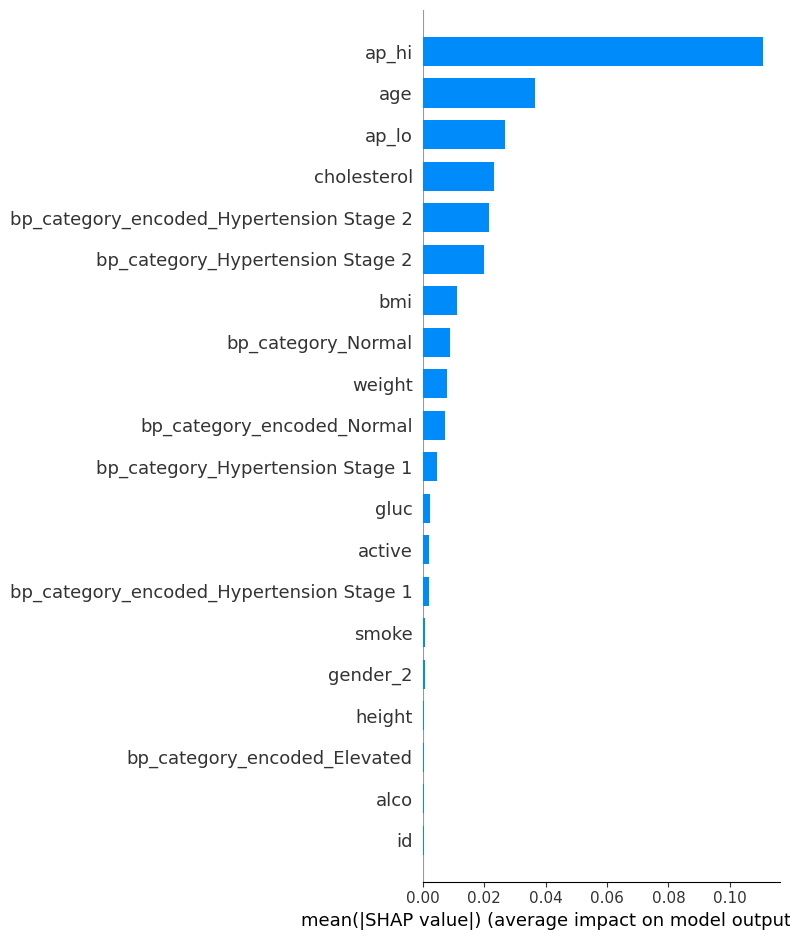

In [32]:



print("Shape of shap_values (class 1):", shap_values[1].shape)
print("Shape of X_test:", sampled_X_test.shape)


shap_values_class_1 = shap_values[1]  


if shap_values_class_1.shape[0] == X_test.shape[1]:
    shap_values_class_1 = shap_values_class_1.T


assert shap_values_class_1.shape[1] == X_test.shape[1], \
    f"Mismatch: SHAP values shape {shap_values_class_1.shape} vs X_test shape {X_test.shape}"


shap.summary_plot(shap_values_class_1, sampled_X_test, plot_type="bar")


In [33]:



def get_patient_details():
    new_patient = {
        'age': int(input("Enter Age: ")),
        'gender': int(input("Enter Gender (0=Female, 1=Male): ")),
        'height': int(input("Enter Height (cm): ")),
        'weight': int(input("Enter Weight (kg): ")),
        'ap_hi': int(input("Enter Systolic BP: ")),
        'ap_lo': int(input("Enter Diastolic BP: ")),
        'cholesterol': int(input("Enter Cholesterol (1-3): ")),
        'gluc': int(input("Enter Glucose (1-3): ")),
        'smoke': int(input("Do you Smoke? (0=No, 1=Yes): ")),
        'alco': int(input("Do you Consume Alcohol? (0=No, 1=Yes): ")),
        'active': int(input("Are you Physically Active? (0=No, 1=Yes): "))
    }
    return new_patient


def predict_cvd():
    new_patient = get_patient_details()
    new_patient_df = pd.DataFrame([new_patient])
    new_patient_df = new_patient_df.reindex(columns=X_train.columns, fill_value=0)
    prediction = rf_model.predict(new_patient_df)[0]
    result = "Prone to CVD (1)" if prediction == 1 else "No CVD Risk (0)"
    print(f"\nPrediction: {result}")


predict_cvd()


ValueError: invalid literal for int() with base 10: ''